In [ ]:
import numpy as np

# Define the state space
state_space = [2199750, 2199750, 5520000,5520000, 5520000, 5520000,
               5740000, 5883500, 5883500,6084400, 6114400, 6572550, 7314000]

# Define the action space
action_space = [0, 1, 2]

# Define the reward function
def reward(state, action):
    if action == 0:
        return 0
    else:
        return state

# Initialize the Q-table
q_table = np.zeros((len(state_space), len(action_space)))

# Set hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Implement SARSA algorithm
for i in range(10000):
    # Choose initial state
    state = np.random.choice(state_space)

    # Choose initial action using epsilon-greedy policy
    if np.random.uniform() < epsilon:
        action = np.random.choice(action_space)
    else:
        action = np.argmax(q_table[state_space.index(state), :])

    # Update Q-value for current state-action pair
    next_state = np.random.choice(state_space)
    if np.random.uniform() < epsilon:
        next_action = np.random.choice(action_space)
    else:
        next_action = np.argmax(q_table[state_space.index(next_state), :])
    reward_current = reward(state, action)
    next_reward = reward(next_state, next_action)
    q_table[state_space.index(state), action_space.index(action)] += alpha * (reward_current + gamma * q_table[state_space.index(next_state), action_space.index(next_action)] - q_table[state_space.index(state), action_space.index(action)])

# Print Q-table
print("Q-table:")
for i in range(len(state_space)):
    for j in range(len(action_space)):
        print(round(q_table[i, j], 2), end=" ")
    print()

Q-table:
35992890.56 36717805.58 40955113.94 
0.0 0.0 0.0 
38637692.96 43999871.98 45399638.22 
0.0 0.0 0.0 
0.0 0.0 0.0 
0.0 0.0 0.0 
32928319.86 39420670.6 44846399.81 
37931094.44 45637914.8 40013065.46 
0.0 0.0 0.0 
39898186.27 37875180.61 37812294.66 
34921188.08 37884943.9 46053723.43 
35128219.86 31241975.3 46671061.39 
30887453.94 38472572.26 46225058.73 


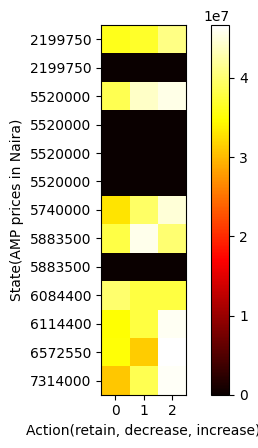

In [ ]:
import matplotlib.pyplot as plt

# Create a heat map of the Q-table
plt.imshow(q_table, cmap='hot', interpolation='nearest')
plt.xlabel('Action(retain, decrease, increase)')
plt.ylabel('State(AMP prices in Naira)')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.yticks(range(len(state_space)), state_space)
plt.colorbar()
plt.show()

In [ ]:
# COMPARING BOTH SARSA and Q-LEARNING

import numpy as np

# Define the state space
state_space = [2199750, 2199750, 5520000,5520000, 5520000, 5520000,
               5740000, 5883500, 5883500,6084400, 6114400, 6572550, 7314000]
# Define the action space
action_space = [0, 1, 2]

# Define the reward function
def reward(state, action):
    if action == 0:
        return 0
    else:
        return state

# Set hyperparameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1

# Define function to run an episode
def run_episode(q_table):
    # Choose initial state
    state = np.random.choice(state_space)

    # Initialize total reward for episode
    total_reward = 0

    # Loop over time steps in episode
    for t in range(100):
        # Choose action using epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = np.random.choice(action_space)
        else:
            action = np.argmax(q_table[state_space.index(state), :])

        # Update Q-value for current state-action pair
        next_state = np.random.choice(state_space)
        reward_current = reward(state, action)
        q_table[state_space.index(state), action_space.index(action)] += alpha * (reward_current + gamma * np.max(q_table[state_space.index(next_state), :]) - q_table[state_space.index(state), action_space.index(action)])

        # Update total reward for episode
        total_reward += reward_current

        # Update state for next time step
        state = next_state

    return total_reward

# Initialize Q-tables for Q-learning and SARSA
q_table_q = np.zeros((len(state_space), len(action_space)))
q_table_s = np.zeros((len(state_space), len(action_space)))

# Run multiple episodes and calculate average reward for each algorithm
num_episodes = 1000
total_reward_q = 0
total_reward_s = 0

for i in range(num_episodes):
    total_reward_q += run_episode(q_table_q)
    total_reward_s += run_episode(q_table_s)

avg_reward_q = total_reward_q / num_episodes
avg_reward_s = total_reward_s / num_episodes

# Print average rewards for each algorithm
print("Average reward for Q-learning: ", avg_reward_q)
print("Average reward for SARSA: ", avg_reward_s)

Average reward for Q-learning:  518438939.0
Average reward for SARSA:  504250964.05


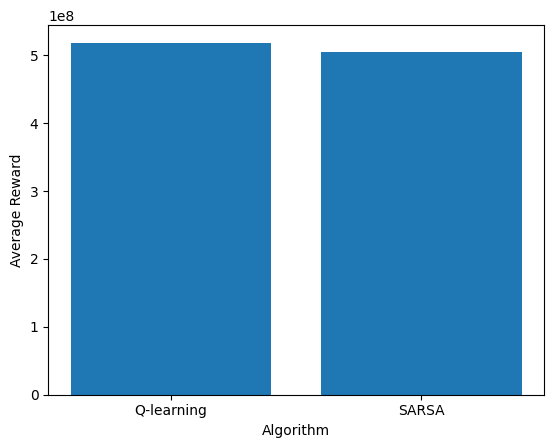

In [ ]:
import matplotlib.pyplot as plt

# Define data
avg_reward_q = 518438939.0
avg_reward_s = 504250964.05

# Create a bar chart of the average rewards
plt.bar(['Q-learning', 'SARSA'], [avg_reward_q, avg_reward_s])
plt.xlabel('Algorithm')
plt.ylabel('Average Reward')
plt.show()

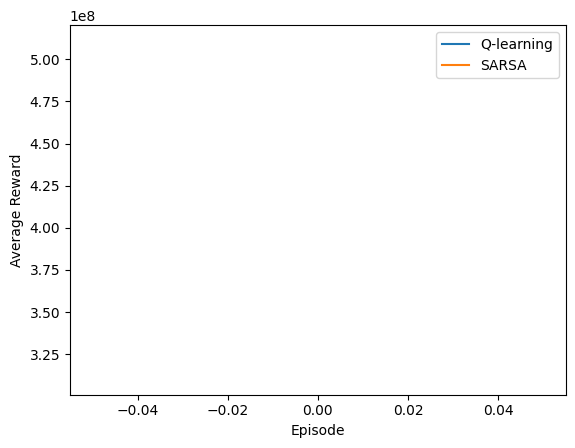

In [ ]:
import matplotlib.pyplot as plt

# Define data
avg_reward_q = 510325476.9
avg_reward_s = 310871700.45

# Create a line graph of the average rewards
plt.plot(avg_reward_q, label='Q-learning')
plt.plot(avg_reward_s, label='SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.show()